# 03 — Exploratory Data Analysis (EDA)
This notebook explores the cleaned dataset produced in the previous step. We look at price trends, the Fear & Greed Index distribution, relationships between sentiment and returns, and some simple lag/correlation checks.

### Load data & set plotting defaults
Load the cleaned dataset and set a consistent plotting style for the rest of the notebook.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DATA_PATH = "../data/processed/merged_clean.csv"

def load_df(path: str = DATA_PATH) -> pd.DataFrame:
    return pd.read_csv(path, index_col=0, parse_dates=True)

def ensure_df() -> pd.DataFrame:
    global df
    if "df" not in globals() or df is None or getattr(df, "empty", False):
        df = load_df()
    return df

# Plot style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

df = ensure_df()
print("Data loaded:", df.shape)
df.head()

Data loaded: (1035, 14)


,Close_BTC,Volume_BTC,BTC_Return,BTC_MA7,BTC_MA30,BTC_Vol30,Close_ETH,Volume_ETH,ETH_Return,ETH_MA7,ETH_MA30,ETH_Vol30,FG_Value,value_classification
Date,,,,,,,,,,,,,,
2023-02-01,23723.769531,26683255504,0.025259,23231.479074,20606.082031,0.023814,1641.792725,8116969489,0.034829,1602.215402,1490.054069,0.028151,56,Greed
2023-02-02,23471.871094,32066936882,-0.010618,23294.206752,20832.482487,0.024069,1643.241577,10558081069,0.000882,1607.949062,1504.336161,0.028141,60,Greed
2023-02-03,23449.322266,27083066007,-0.000961,23347.148717,21052.018620,0.024180,1664.745605,8169519805,0.013086,1617.461792,1517.943461,0.027785,60,Greed
2023-02-04,23331.847656,15639298538,-0.005010,23390.114118,21268.522331,0.024251,1667.059204,5843302512,0.001390,1630.979527,1531.830815,0.027695,58,Greed
2023-02-05,22955.666016,19564262605,-0.016123,23273.128348,21468.645573,0.024751,1631.645874,6926696531,-0.021243,1628.906703,1543.906376,0.028253,58,Greed


### Quick summary & sentiment distribution
Get basic summary statistics and a quick look at how the Fear & Greed Index is distributed in this sample.

           Close_BTC    Close_ETH     FG_Value
count    1035.000000  1035.000000  1035.000000
mean    66185.535407  2660.191972    56.944928
std     31535.603906   837.640059    16.682142
min     20187.244141  1429.158081    10.000000
25%     30654.557617  1871.952942    48.000000
50%     64178.992188  2526.441895    60.000000
75%     96496.214844  3331.413330    71.000000
max    124752.531250  4831.348633    94.000000


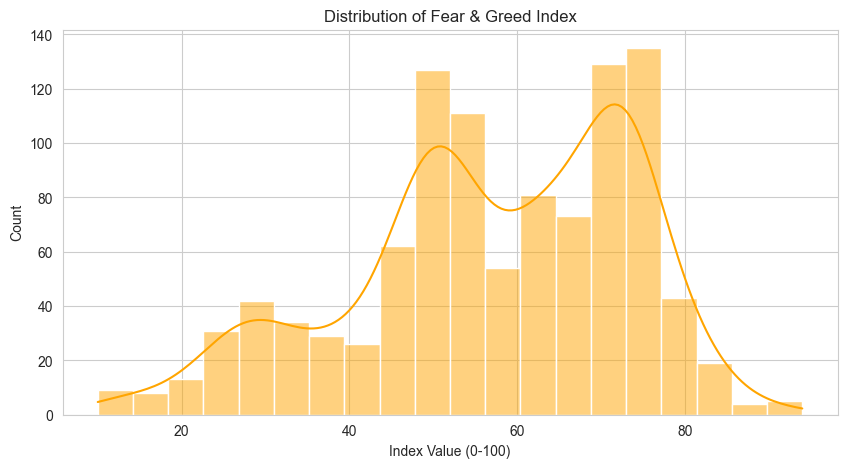

In [ ]:
df = ensure_df()

# Summary statistics for prices and sentiment
print(df[["Close_BTC", "Close_ETH", "FG_Value"]].describe())

# Distribution of sentiment
plt.figure(figsize=(10, 5))
sns.histplot(df["FG_Value"], bins=20, kde=True, color="orange")
plt.title("Distribution of Fear & Greed Index")
plt.xlabel("Index Value (0-100)")
plt.show()

### BTC price vs sentiment over time
Overlay BTC price with the sentiment index to see how they move together across the full period.

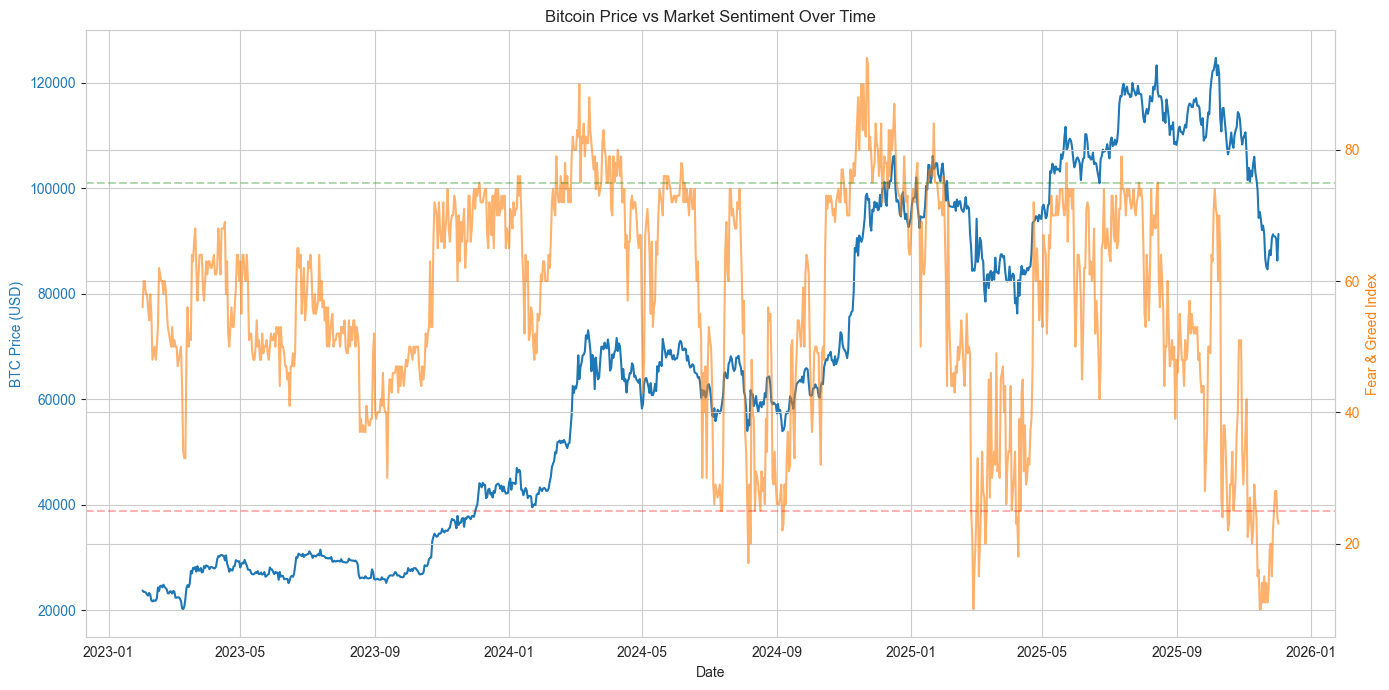

In [ ]:
df = ensure_df()

# Plot BTC Price vs Fear & Greed Index
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot price on left axis
color = "tab:blue"
ax1.set_xlabel("Date")
ax1.set_ylabel("BTC Price (USD)", color=color)
ax1.plot(df.index, df["Close_BTC"], color=color, label="BTC Price")
ax1.tick_params(axis="y", labelcolor=color)

# Create a second y-axis for sentiment
ax2 = ax1.twinx()
color = "tab:orange"
ax2.set_ylabel("Fear & Greed Index", color=color)
ax2.plot(df.index, df["FG_Value"], color=color, alpha=0.6, label="Sentiment")
ax2.tick_params(axis="y", labelcolor=color)

# Highlight fear/greed zones
ax2.axhline(25, color="red", linestyle="--", alpha=0.3, label="Extreme Fear (<25)")
ax2.axhline(75, color="green", linestyle="--", alpha=0.3, label="Extreme Greed (>75)")

plt.title("Bitcoin Price vs Market Sentiment Over Time")
fig.tight_layout()
plt.show()

### Correlations (returns, volatility, sentiment)
Compute a simple correlation matrix to see which variables tend to move together.

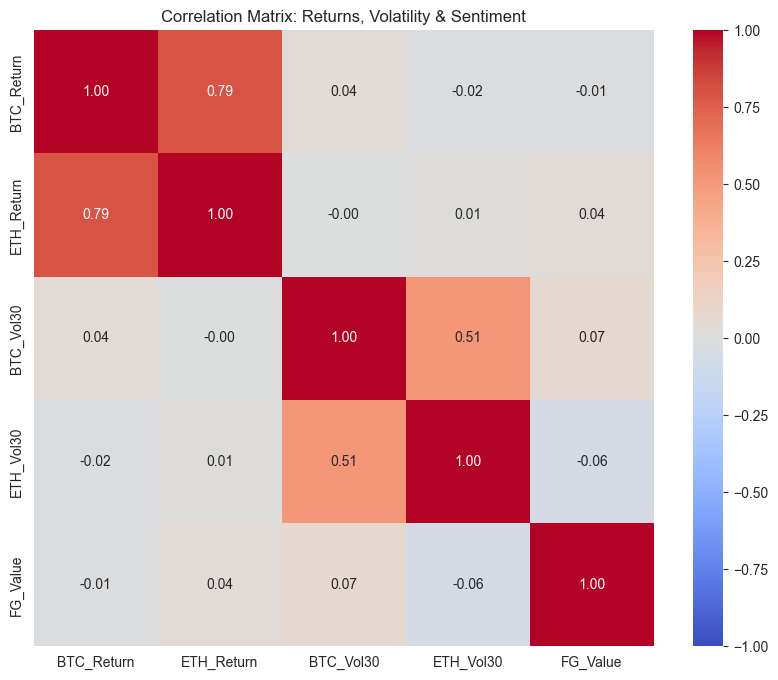

In [ ]:
df = ensure_df()

# Select numeric columns for correlation
cols = ["BTC_Return", "ETH_Return", "BTC_Vol30", "ETH_Vol30", "FG_Value"]
corr_matrix = df[cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f")
plt.title("Correlation Matrix: Returns, Volatility & Sentiment")
plt.show()

### Sentiment vs BTC returns (scatter)
A quick regression-style scatter plot to see if higher sentiment is associated with higher daily BTC returns.

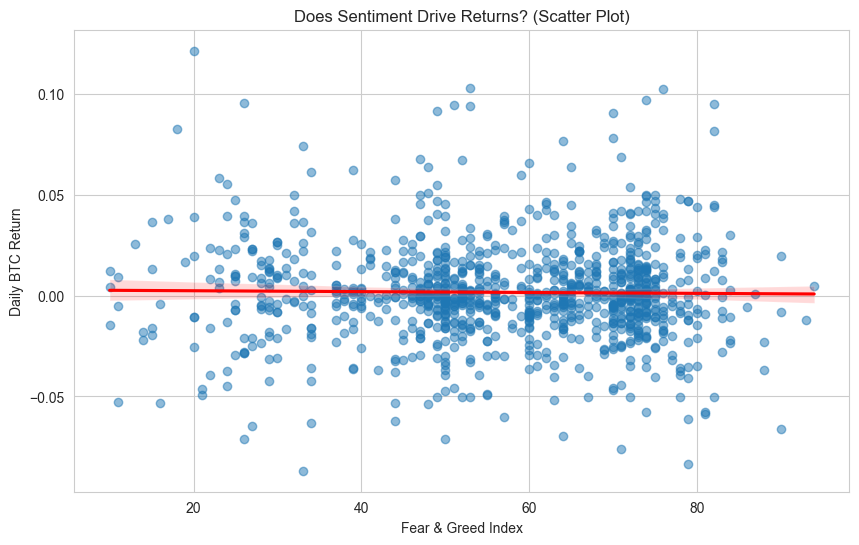

In [ ]:
df = ensure_df()

plt.figure(figsize=(10, 6))
sns.regplot(
    x="FG_Value",
    y="BTC_Return",
    data=df,
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "red"},
)
plt.title("Does Sentiment Drive Returns? (Scatter Plot)")
plt.xlabel("Fear & Greed Index")
plt.ylabel("Daily BTC Return")
plt.show()

### Returns by sentiment regime (boxplot)
Compare the distribution of daily BTC returns across the sentiment categories (Fear → Greed).

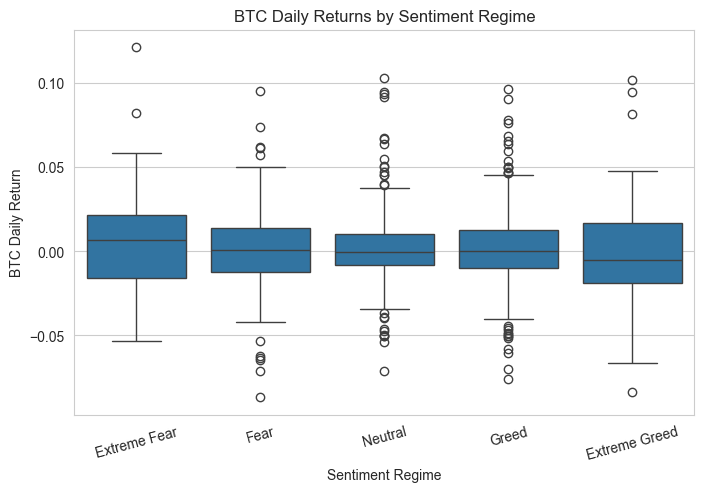

In [ ]:
df = ensure_df()

plt.figure(figsize=(8, 5))
sns.boxplot(
    x="value_classification",
    y="BTC_Return",
    data=df,
    order=["Extreme Fear", "Fear", "Neutral", "Greed", "Extreme Greed"],
)
plt.title("BTC Daily Returns by Sentiment Regime")
plt.xlabel("Sentiment Regime")
plt.ylabel("BTC Daily Return")
plt.xticks(rotation=15)
plt.show()

### Rolling volatility vs sentiment
Check whether spikes in volatility line up with fear/greed changes.

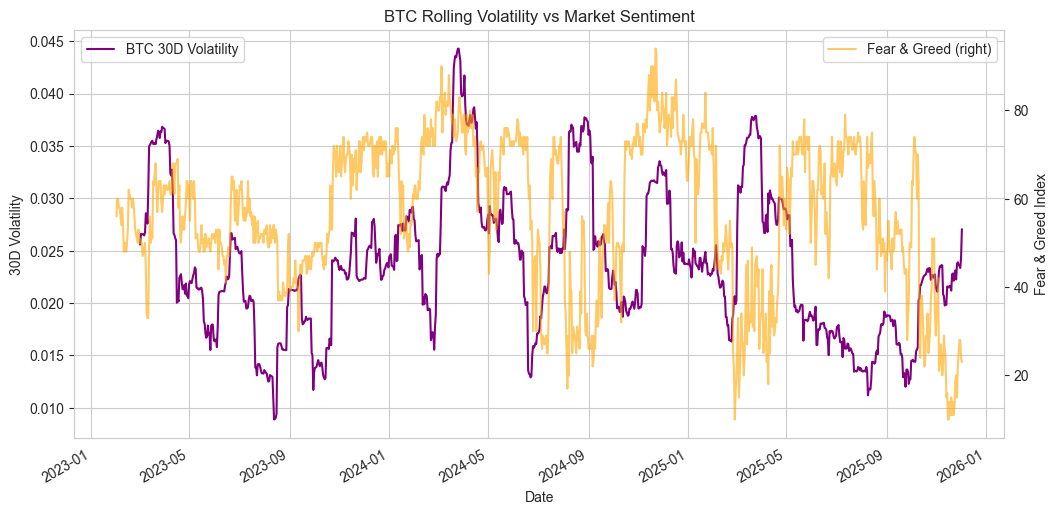

In [ ]:
df = ensure_df().copy()

df["BTC_RollVol30"] = df["BTC_Return"].rolling(window=30).std()

ax1 = df["BTC_RollVol30"].plot(figsize=(12, 6), label="BTC 30D Volatility", color="purple")
ax2 = df["FG_Value"].plot(secondary_y=True, label="Fear & Greed", color="orange", alpha=0.6)

ax1.set_ylabel("30D Volatility")
ax2.set_ylabel("Fear & Greed Index")
ax1.set_title("BTC Rolling Volatility vs Market Sentiment")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.show()

## Lag & correlation checks
A quick look at how sentiment correlates with returns, including simple 1-day and 3-day lags.

### Create lagged sentiment features
Create 1-day and 3-day lag versions of sentiment and build a lagged dataset for correlation checks.

In [ ]:
df = ensure_df().copy()

df["FG_lag1"] = df["FG_Value"].shift(1)
df["FG_lag3"] = df["FG_Value"].shift(3)

# Drop initial NaNs created by lagging
df_lag = df.dropna(subset=["FG_lag1", "FG_lag3"])
df_lag[["FG_Value", "FG_lag1", "FG_lag3"]].head()

,FG_Value,FG_lag1,FG_lag3
Date,,,
2023-02-04,58,60.0,56.0
2023-02-05,58,58.0,60.0
2023-02-06,56,58.0,60.0
2023-02-07,54,56.0,58.0
2023-02-08,58,54.0,58.0


### Correlation table (current vs lagged sentiment)
Compute correlations between returns and both current and lagged sentiment.

In [ ]:
df = ensure_df().copy()

df["FG_lag1"] = df["FG_Value"].shift(1)
df["FG_lag3"] = df["FG_Value"].shift(3)
df_lag = df.dropna(subset=["FG_lag1", "FG_lag3"])

corr_lag = df_lag[["BTC_Return", "ETH_Return", "FG_Value", "FG_lag1", "FG_lag3"]].corr()
corr_lag

,BTC_Return,ETH_Return,FG_Value,FG_lag1,FG_lag3
BTC_Return,1.000000,0.791638,-0.014497,-0.010878,-0.007611
ETH_Return,0.791638,1.000000,0.037528,0.033471,0.031888
FG_Value,-0.014497,0.037528,1.000000,0.933737,0.858010
FG_lag1,-0.010878,0.033471,0.933737,1.000000,0.895181
FG_lag3,-0.007611,0.031888,0.858010,0.895181,1.000000


### Visualize lag correlations
Plot the correlation matrix as a heatmap for easier comparison.

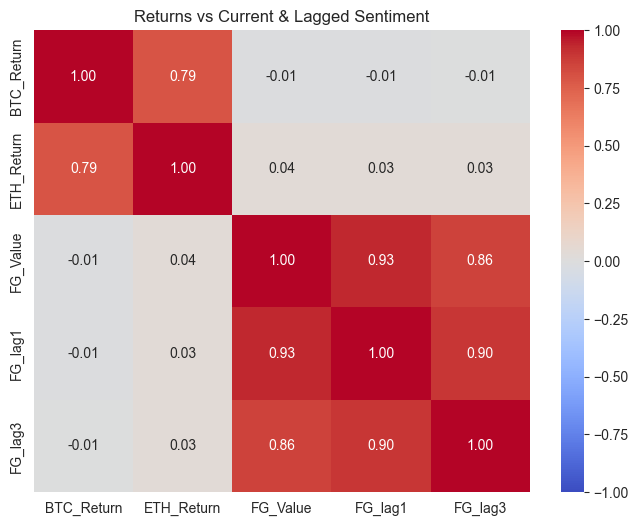

In [ ]:
df = ensure_df().copy()

df["FG_lag1"] = df["FG_Value"].shift(1)
df["FG_lag3"] = df["FG_Value"].shift(3)
df_lag = df.dropna(subset=["FG_lag1", "FG_lag3"])

corr_lag = df_lag[["BTC_Return", "ETH_Return", "FG_Value", "FG_lag1", "FG_lag3"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_lag, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f")
plt.title("Returns vs Current & Lagged Sentiment")
plt.show()

### BTC vs ETH return correlation
Sanity-check how tightly BTC and ETH daily returns move together.

In [ ]:
df = ensure_df()

df[["BTC_Return", "ETH_Return"]].corr()

,BTC_Return,ETH_Return
BTC_Return,1.000000,0.791651
ETH_Return,0.791651,1.000000


## Objective check (Sentiment ↔ Returns)
This section explicitly checks whether the Fear & Greed Index has a measurable relationship with daily BTC/ETH returns in this dataset, including a couple of simple lags.

In [ ]:
df = ensure_df().copy()

# Ensure lag features exist
df["FG_lag1"] = df["FG_Value"].shift(1)
df["FG_lag3"] = df["FG_Value"].shift(3)

corr_targets = ["BTC_Return", "ETH_Return"]
sent_cols = ["FG_Value", "FG_lag1", "FG_lag3"]

corr_table = df[corr_targets + sent_cols].corr().loc[corr_targets, sent_cols]
print("Pearson correlations (Returns vs Sentiment):")
display(corr_table.round(4))

# Optional: monotonic relationship check (robust to non-linear scaling)
spearman_table = df[corr_targets + sent_cols].corr(method="spearman").loc[corr_targets, sent_cols]
print("\nSpearman correlations (Returns vs Sentiment):")
display(spearman_table.round(4))

Pearson correlations (Returns vs Sentiment):


,FG_Value,FG_lag1,FG_lag3
BTC_Return,-0.0146,-0.0109,-0.0076
ETH_Return,0.0375,0.0335,0.0319



Spearman correlations (Returns vs Sentiment):


,FG_Value,FG_lag1,FG_lag3
BTC_Return,-0.0193,-0.0209,-0.0009
ETH_Return,0.0352,0.0215,0.0305


## Inference (Was the objective fulfilled?)

### What we checked
- We computed correlations between market sentiment (Fear & Greed Index) and daily returns for BTC and ETH.
- We also checked simple lag effects (sentiment shifted by 1 and 3 days).

### What the results show in this dataset
- The sentiment↔return correlations are **very close to zero**.
  - Pearson: BTC vs FG ≈ -0.015 (lag1 ≈ -0.011, lag3 ≈ -0.008); ETH vs FG ≈ +0.038 (lag1 ≈ +0.034, lag3 ≈ +0.032).
  - Spearman is similarly small in magnitude (near 0).
- Interpretation: **within this time window and at daily frequency**, the Fear & Greed Index does not show a strong relationship with next-day returns.
- By contrast, BTC and ETH returns are strongly correlated with each other (market-wide moves), which is expected.

### Conclusion
- **Objective fulfilled:** yes — the notebook measures and visualizes the relationship between sentiment and returns (scatter, regime boxplot, correlation matrices, and lag checks).
- **Hypothesis outcome:** the data suggests **weak/no predictive correlation** between Fear & Greed and daily BTC/ETH returns for the period analyzed.

### Notes / limitations
- A weak daily correlation doesn’t rule out relationships at different horizons (weekly/monthly), non-linear effects, or regime-dependent behavior.
- Correlation is not causation; a more formal model (with controls and out-of-sample testing) would be needed to claim predictability.

## Final summary figure
A compact heatmap of the sentiment vs returns correlations (current and lagged).

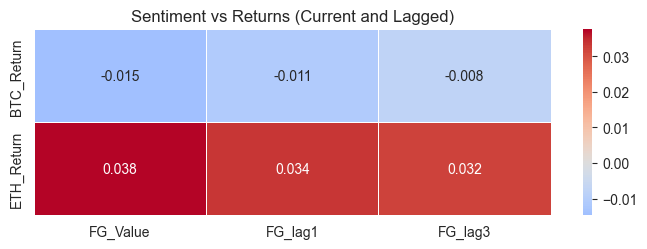

In [ ]:
df = ensure_df().copy()

df["FG_lag1"] = df["FG_Value"].shift(1)
df["FG_lag3"] = df["FG_Value"].shift(3)

corr_targets = ["BTC_Return", "ETH_Return"]
sent_cols = ["FG_Value", "FG_lag1", "FG_lag3"]
corr_table = df[corr_targets + sent_cols].corr().loc[corr_targets, sent_cols]

plt.figure(figsize=(7, 2.6))
sns.heatmap(
    corr_table,
    annot=True,
    fmt=".3f",
    cmap="coolwarm",
    center=0,
    cbar=True,
    linewidths=0.5,
    linecolor="white",
)
plt.title("Sentiment vs Returns (Current and Lagged)")
plt.ylabel("")
plt.xlabel("")
plt.tight_layout()
plt.show()